## Modelado de datos con Redes Neuronales (Class 9)
### Topic: Logistic regression

## Order of the class:
* welcome back after the holiday
* new resolution for 2022
* homeworks and git-hub update 
https://github.com/mhemmg/NeuralNetworkRSouzaCourse/tree/master/Notebooks/extras/HomeworksSubmissions
  * good job!! some of you
  * time until the end of the week to upload homework 4 (only, the rest is closed)
  * unless someone can prove that did sent me old homeworks by mail 
* visiting guest (git again..)
* what we have done so far

### Dictionary:
* resolution: resolucion
  * resolution of an image
  * a promise to yourself to do or to not do something
  * decision of a groupd of people
* malignant/benign: maligno/benigno 
* cancer/tumor
* keep doing/asking/working : sigue haciendo, preguntandose/trabajando
* switch on/off: prender y apagar

* to turn
  * change direction: cambiar direcion
  * change one thing into another: cambiar una cosa a otra

### What we can do so far
* we have general idea about machine learning
* we know how to program in Python
* we know how to work with the data
  * how to manipulate and display the data from CSV, dictionary, internet link, MAT file
* we know how the linear regression works
  * how fitting works
  * what is loss function (error function)
  * we know what it means to minimize loss function
  * what is least square method, curve-fit
  * we know how gradient descent work - you can even write your own code!
  * we know the metrics MSE, MAE, MAPE, RMSE, R2
  * we know how to use the uni and multivariate regression using scikit-learn
* logistic regression.

# But why do we learn all those things if we want to work with Neural Network...? Lets review the above again and argue if they are necessary

#### Repeated advice
* close the computer
* walk around the room and ask yourself: do I understand:
  * eg do I understand the linear regression?
  * do I understand why I need all this things?
  * after todays class as yourself if I understand Logistic regression
  * if not, why??? what doesnt make sense???
  
Why are we doing the logistic regression if the course is about Neural Networks? (keep asking yourself important questions) and be honest with yourself

You are right not to understand those things, nothing is obvious about machine learning

* ask yourself after the todays class what does "hypothesis" mean? 

## Classification problem and logistic regression (supervised learning)

* You can look at this problem from many different angles and in different order so lets try it one way.

***The logistic regression turns values into probabilities.***
and those probabilites will be used in the Neural Networks (remember the activation function in the simple NN? can be sigmoid...)

<img src="imgs/NN_sigmoid.jpg" width="800" /> 

To see this we can take a look at simple classification examples.

* Classification problem: cancer malignant/benign, spam/no-spam (supervised learning)

* Multi-class classification problem: fruits classification, handwritten digits classification...

* Logistic regression "switches on/off" the neurons in the Neural Network...

# 1D problem, tumor classification based on one feature (radius of the tumor)

Lets imagine that a doctor has to give a diagnosis of patient that has s tumor. For simplicity assume that he takes into account only the size (radius of the tumor). He has the data from different patients and the diagnosis depending of the size of the tumor. 

<img src="imgs/logistic_52.png" width="500" /> 

If he tried linear regression like on the left side of the image the hypothesis would be as before:
* linear regression hypothesis $h_{\theta}(x)=\theta_0+\theta_1x$ - which is a straight line

But the tumor belongs to only two classes (here 0: benign, 1: malignant) with a probability of the tumor to be let say malignant between 0 and 1. So the hypothesis of the linear regression would violate allowed range of the probabilty and could surpass value 1.

What the doctor really wants is hypothesis that would lie within a range between $ 0 \leq h_{\theta}(x) \leq 1$

In other words the diagnosis should depend on two conditions:

* if $h_{\theta}(x) \geq 0.5$ predict 1 (malignant cancer)
* if $h_{\theta}(x) < 0.5$ predict 0 (benign cancer)

How to construct such hypothesis?

### Logistic regression
The answer is Logistic regression. Book definition: Logistic regression is a predictive linear model that aims to explain the relationship between a dependent binary variable and one or more independent variables. The output of Logistic Regression is a number between 0 and 1 which you can think about as being the probability that a given class is true or not. 

The output is between 0 and 1 is because the output is transformed by a function which usually is the logistic sigmoid function.

***The logistic regression turns values into probabilities.***

The formula for Logistic Regression, is the following

$$g(z)=\frac{1}{1+e^{-(z)}}$$
where $z$ can be a function
(quite meaningless if we dont see any example)

for a simple one feature (x) case, is the following:

$$g(\theta_0+\theta_1 x)=\frac{1}{1+e^{-(\theta_0+\theta_1 x)}}$$

* g($\theta_0+\theta_1 x$)  = is an ouput between 0 and 1
* x = feature
* $\theta_0$,$\theta_1$ are learned parameters

In Logistic Regression, our goal is to learn parameters $\theta_0$ and $\theta_1$, similar to Linear Regression. The difference being that for a given x, the resulting ($\theta_0+\theta_1 x$) is then changed by the sigmoid function returning a number between 0 and 1.

more general 
$$g(\theta^T X)=\frac{1}{1+e^{-(\theta^T X)}}*$$

as we rememeber from the previous class that 
$h_{\theta}(x)=\theta^T X $ comes from the matrix multiplication between vector of parameters and features

$$ \theta =
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\vdots\\
\theta_{n}
\end{bmatrix}
$$

$$ X=
\begin{bmatrix}
1 \\
x_{1} \\
x_{2} \\
\vdots\\
x_{n}
\end{bmatrix}
$$

If $x_0=1$ then we can rewrite this as a matrix - matrix multiplication (if we do the transpose of the first matrix)


<img src="imgs/logistic_52.png" width="500" /> 

Sigmoid 
<img src="imgs/logistic_4.png" width="300" /> 

## Hypothesis for logistic regression
Hence the hypothesis is:

$$h_{\theta}(x)=g(\theta^Tx)$$

$$g(z)=\frac{1}{1+e^{-(z)}}$$

so for one feature case like the tumor cancer classification based on its radius: 
 
$$h_{\theta}(x)=\frac{1}{1+e^{-(\theta_0+\theta_1 x)}}$$

* if $h_{\theta}(x) \geq 0.5$ predict 1
* if $h_{\theta}(x) < 0.5$ predict 0

note that:

* $h_{\theta}(x) = 0.5$ ***if*** ($\theta_0+\theta_1 x) = 0$... why? substitute and check by yourself
* $h_{\theta}(x) \geq 0.5$ ***if*** ($\theta_0+\theta_1 x) \geq 0$
* $h_{\theta}(x) < 0.5$ ***if*** ($\theta_0+\theta_1 x) < 0$

more generarly:

* $h_{\theta}(x) = 0.5$ ***if*** ($\theta^T X) = 0$
* $h_{\theta}(x) \geq 0.5$ ***if*** ($\theta^T X) \geq 0$
* $h_{\theta}(x) < 0.5$ ***if*** ($\theta^T X) < 0$

### Simple example tumor classification based on one feature (radius)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [51]:
### Simple example - one feature one binary output
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [52]:
bc = load_breast_cancer()

In [53]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [87]:
#print(bc.DESCR)
#print(bc.target)
X_data=bc.data
y_data=bc.target

In [55]:
X_data.shape

(569, 30)

In [56]:
X_data = X_data[:,0]
X_data = X_data.reshape(-1,1)

In [57]:
print(X_data[0:10])
print(y_data[0:10])

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]
[0 0 0 0 0 0 0 0 0 0]


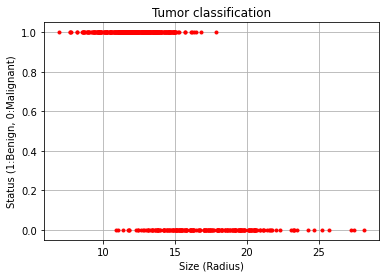

In [58]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(1,1)
ax.plot(X_data,y_data,'.r')
ax.set_title("Tumor classification")
ax.set_xlabel('Size (Radius)')
ax.set_ylabel('Status (1:Benign, 0:Malignant)')
ax.grid(True)

On the X-axis you see the size of the tumor (radius) that was measuered and on the Y-axis you see the tumor status. Our goal is to use Logistic Regression to come up with a model that generates the probability of tumor being malignant (0) or benign from any size.
Note that it depends on who and how labeled the data to get malignant=0

## Implementing the logistic regression using scikit-learn

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2)

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [77]:
logreg.score(X_train, y_train)

0.8813186813186813

In [78]:
logreg.score(X_test, y_test)

0.868421052631579

In [79]:
print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.2f}')

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.87


In [80]:
logreg.predict_proba([[20]])[0]

array([0.99484969, 0.00515031])

In [83]:
p_malignant, p_benign = logreg.predict_proba([[20]])[0] # note double bracket!!
print(p_malignant, p_benign)

0.9948496882820713 0.005150311717928672


In [84]:
sizes = np.linspace(1, 30, 100)
probabilities= []
for i in sizes:
    p_loss, p_win = logreg.predict_proba([[i]])[0]
    probabilities.append(p_win)

Text(0, 0.5, 'Status (1:Benign, 0:Malignant)')

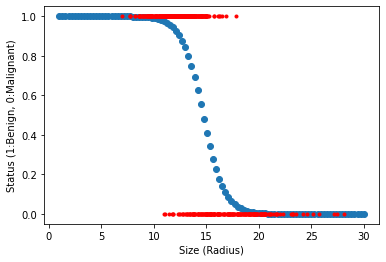

In [85]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.scatter(sizes,probabilities)
ax.plot(X_data,y_data,'.r')
ax.set_xlabel('Size (Radius)')
ax.set_ylabel('Status (1:Benign, 0:Malignant)')

#### In the above problem we performed a fitting to data using the logistic function (Sigmoid function) We turned data into probability